### Predictive modeling for Classification Project on OrderAgian

## OrderAgain Dataset 

In [1]:
# Data Mining
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw = pd.read_csv("onlinefoods.csv")

In [3]:
raw.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

In [4]:
raw.head(2)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive


**Basic Checks**

In [5]:
raw.shape

(388, 12)

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


### Handling Duplicates

* Convert categorical columns into lower case for duplicates check

### Note

* You need to check before data validation and after validation

In [7]:
raw = raw.drop_duplicates().reset_index(drop=True)

In [8]:
raw[raw.duplicated()]

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback


In [9]:
for i in raw.columns:
    if raw[i].dtype == object:
        raw[i] = raw[i].str.lower()

In [10]:
raw.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,female,single,student,no income,post graduate,4,12.9766,77.5993,560001,yes,positive
1,24,female,single,student,below rs.10000,graduate,3,12.9770,77.5773,560009,yes,positive
2,22,male,single,student,below rs.10000,post graduate,3,12.9551,77.6593,560017,yes,negative
3,22,female,single,student,no income,graduate,6,12.9473,77.5616,560019,yes,positive
4,22,male,single,student,below rs.10000,post graduate,4,12.9850,77.5533,560010,yes,positive


### Checking Missing Values

In [11]:
raw.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

### 1. Data validation & Cleaning

 #### Checking each and every column data
 
   * We are using string methods for this entire analysis
   
   * Here I am modifying all columns data

In [12]:
raw.rename(columns = {'Marital Status':'Marital_Status',
                      'Educational Qualifications':'Educational_Qualifications',
                      'Monthly Income':'Monthly_Income',
                      'Family size':'Family_size','Pin code':'Pin_code'},inplace=True)

In [13]:
raw.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,Output,Feedback
0,20,female,single,student,no income,post graduate,4,12.9766,77.5993,560001,yes,positive
1,24,female,single,student,below rs.10000,graduate,3,12.9770,77.5773,560009,yes,positive
2,22,male,single,student,below rs.10000,post graduate,3,12.9551,77.6593,560017,yes,negative
3,22,female,single,student,no income,graduate,6,12.9473,77.5616,560019,yes,positive
4,22,male,single,student,below rs.10000,post graduate,4,12.9850,77.5533,560010,yes,positive


* Data is Valid

* Replacing special characters

    * We will be using replace method in pandas
            * str.replace - Will be used to replace any character in string
            * replace - Will be used to replace entire string
            
    
    

### Python code

**Area**

    * We are adding Area column by using latitude and longitude columns 

In [14]:
raw['coordinates'] = raw['latitude'].apply(str)+ "," +raw['longitude'].apply(str)
raw.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,Output,Feedback,coordinates
0,20,female,single,student,no income,post graduate,4,12.9766,77.5993,560001,yes,positive,"12.9766,77.5993"
1,24,female,single,student,below rs.10000,graduate,3,12.9770,77.5773,560009,yes,positive,"12.977,77.5773"
2,22,male,single,student,below rs.10000,post graduate,3,12.9551,77.6593,560017,yes,negative,"12.9551,77.6593"
3,22,female,single,student,no income,graduate,6,12.9473,77.5616,560019,yes,positive,"12.9473,77.5616"
4,22,male,single,student,below rs.10000,post graduate,4,12.9850,77.5533,560010,yes,positive,"12.985,77.5533"


In [15]:
# !pip install geopandas
# !pip install geopy
# !pip install geocoder

In [16]:
# Import the necessary libraries

import geopandas as gpd
import geopy
import geocoder
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [17]:
geolocator = Nominatim(user_agent="Nancy Amandi", timeout= 10)
rgeocode = RateLimiter(geolocator.reverse, min_delay_seconds=0.1)
raw["location"] = raw["coordinates"].apply(rgeocode)

In [18]:
raw.head(3)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,Output,Feedback,coordinates,location
0,20,female,single,student,no income,post graduate,4,12.9766,77.5993,560001,yes,positive,"12.9766,77.5993","(Mahatma Gandhi Circle, Kasturba Road, Shantha..."
1,24,female,single,student,below rs.10000,graduate,3,12.9770,77.5773,560009,yes,positive,"12.977,77.5773","(Jayant Probikes & Fitness, 7, 2nd Cross Road,..."
2,22,male,single,student,below rs.10000,post graduate,3,12.9551,77.6593,560017,yes,negative,"12.9551,77.6593","(5th Cross Road, Vinayaka Nagar B Block, Konen..."


In [19]:
def get_suburb(row):
    location = row["location"]
    
    try:
        return location.raw["address"]["suburb"]
    except KeyError:
        return " "

def get_city(row):
    location = row["location"]
    try:
        return location.raw["address"]["city"]
    except KeyError:
        return " "

def get_state(row):
    location = row["location"]
    try:
        return location.raw["address"]["state"]
    except KeyError:
        return " "

In [20]:
raw["city"] = raw.apply(get_suburb, axis=1)
raw["suburb"] = raw.apply(get_city, axis=1)
raw["state"] = raw.apply(get_state, axis=1)
raw.head(3)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,Output,Feedback,coordinates,location,city,suburb,state
0,20,female,single,student,no income,post graduate,4,12.9766,77.5993,560001,yes,positive,"12.9766,77.5993","(Mahatma Gandhi Circle, Kasturba Road, Shantha...",Shanthala Nagar,Bengaluru,Karnataka
1,24,female,single,student,below rs.10000,graduate,3,12.9770,77.5773,560009,yes,positive,"12.977,77.5773","(Jayant Probikes & Fitness, 7, 2nd Cross Road,...",Gandhinagar,Bengaluru,Karnataka
2,22,male,single,student,below rs.10000,post graduate,3,12.9551,77.6593,560017,yes,negative,"12.9551,77.6593","(5th Cross Road, Vinayaka Nagar B Block, Konen...",Konena Agrahara Ward,Bengaluru,Karnataka


### Deleting columns

In [21]:
Delete = ['latitude','longitude','coordinates','location','suburb','state']

In [22]:
raw = raw.drop(columns = Delete)

In [23]:
raw.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,city
0,20,female,single,student,no income,post graduate,4,560001,yes,positive,Shanthala Nagar
1,24,female,single,student,below rs.10000,graduate,3,560009,yes,positive,Gandhinagar
2,22,male,single,student,below rs.10000,post graduate,3,560017,yes,negative,Konena Agrahara Ward
3,22,female,single,student,no income,graduate,6,560019,yes,positive,Hanumanth Nagar Ward
4,22,male,single,student,below rs.10000,post graduate,4,560010,yes,positive,Shivanagara


**Age**

In [24]:
raw.Age.unique(),raw.Age.nunique(),raw.Age.dtype

(array([20, 24, 22, 27, 23, 21, 28, 25, 32, 30, 31, 26, 18, 19, 33, 29],
       dtype=int64),
 16,
 dtype('int64'))

**Gender**

In [25]:
raw.Gender.unique(),raw.Gender.nunique(),raw.Gender.dtype

(array(['female', 'male'], dtype=object), 2, dtype('O'))

**Marital_Status**

In [26]:
raw.Marital_Status = raw.Marital_Status.str.replace(" ","_")

In [27]:
raw.Marital_Status.unique(),raw.Marital_Status.nunique(),raw.Marital_Status.dtype

(array(['single', 'married', 'prefer_not_to_say'], dtype=object),
 3,
 dtype('O'))

**Occupation**

In [28]:
raw.Occupation = raw.Occupation.str.replace(" ","_")

In [29]:
raw.Occupation.unique(),raw.Occupation.nunique(),raw.Occupation.dtype

(array(['student', 'employee', 'self_employeed', 'house_wife'],
       dtype=object),
 4,
 dtype('O'))

#### Monthly_Income

In [30]:
raw.Monthly_Income = raw.Monthly_Income.str.replace(" ","_").str.replace("_rs.","_")

In [31]:
raw.Monthly_Income.unique(),raw.Monthly_Income.nunique(),raw.Monthly_Income.dtype

(array(['no_income', 'below_10000', 'more_than_50000', '10001_to_25000',
        '25001_to_50000'], dtype=object),
 5,
 dtype('O'))

In [32]:
raw.Monthly_Income.replace({"no_income":"no_income",
                            "below_10000":"low_income",
                            "10001_to_25000":"moderate_income",
                            "25001_to_50000":"high_income",
                            "more_than_50000":"very_high_income"},inplace = True)                           

In [33]:
raw.Monthly_Income.value_counts()

no_income           131
high_income          52
very_high_income     47
moderate_income      36
low_income           19
Name: Monthly_Income, dtype: int64

* Data is valid
* Replace the Special charcters and also replace the column data properly in the Monthly_Income.

**Educational_Qualifications**

In [34]:
raw.Educational_Qualifications = raw.Educational_Qualifications.str.replace(" ","_").str.replace(".","_")

In [35]:
raw.Educational_Qualifications.unique(),raw.Educational_Qualifications.nunique(),raw.Educational_Qualifications.dtype

(array(['post_graduate', 'graduate', 'ph_d', 'uneducated', 'school'],
       dtype=object),
 5,
 dtype('O'))

**Family_size**

In [36]:
raw.Family_size.unique(),raw.Family_size.nunique(),raw.Family_size.dtype

(array([4, 3, 6, 2, 5, 1], dtype=int64), 6, dtype('int64'))

**Pin_code**	

In [37]:
raw.Pin_code.unique(),raw.Pin_code.nunique(),raw.Pin_code.dtype

(array([560001, 560009, 560017, 560019, 560010, 560103, 560042, 560048,
        560078, 560004, 560068, 560038, 560008, 560032, 560033, 560021,
        560085, 560050, 560098, 560003, 560066, 560034, 560102, 560025,
        560026, 560043, 560002, 560086, 560076, 560096, 560029, 560046,
        560030, 560024, 560020, 560028, 560064, 560036, 560011, 560061,
        560022, 560027, 560007, 560012, 560006, 560047, 560005, 560073,
        560016, 560013, 560051, 560015, 560018, 560109, 560023, 560104,
        560041, 560049, 560045, 560055, 560060, 560062, 560070, 560075,
        560080, 560092, 560095, 560097, 560093, 560091, 560100, 560079,
        560059, 560067, 560014, 560056, 560072], dtype=int64),
 77,
 dtype('int64'))

**Output** 

In [38]:
raw.Output.unique(),raw.Output.nunique(),raw.Output.dtype

(array(['yes', 'no'], dtype=object), 2, dtype('O'))

**Feedback**

In [39]:
raw.Feedback = raw.Feedback.str.replace(" ","")

In [40]:
raw.Feedback.unique(),raw.Feedback.nunique(),raw.Feedback.dtype

(array(['positive', 'negative'], dtype=object), 2, dtype('O'))

**city to Area**

In [41]:
raw.rename(columns = {'city':'Area'},inplace = True)                   

In [42]:
raw.Area = raw.Area.str.replace(" ","_")

In [43]:
raw.Area.unique(),raw.Area.nunique(),raw.Area.dtype

(array(['Shanthala_Nagar', 'Gandhinagar', 'Konena_Agrahara_Ward',
        'Hanumanth_Nagar_Ward', 'Shivanagara', 'Devarabeesanahalli',
        'Halasooru', 'Garudachara_Palya', 'Jaraganahalli_Ward',
        'Basavanagudi', 'Mangammanapalya', 'Hoysala_Nagara',
        'Sulthanpalya', 'Maruthi_Seva_Nagar', 'Sriramapura',
        'Banashankari_3rd_Stage', 'Vidyapeeta_ward', 'Srinivasapura',
        'Malleswaram', 'Hagadur', 'Koramangala', 'HSR_Layout',
        'Ashok_Nagar', 'Valmiki_Nagar', 'Banasavadi',
        'Dharmaraya_Swamy_Temple_Ward', 'Nagapura_Ward', 'Arekere',
        'Nandini_Layout', 'Suddagunte_Palya_Ward', 'Jayamahal_Ward',
        'Adugodi', 'Kempapura', 'Thyagaraja_Nagar',
        'Yelahanka_Satellite_Town', 'Bellanduru', 'Jayanagar_East',
        'Subramanyapura', 'HMT_Ward', 'Hombegowda_Nagara', 'Agaram',
        'Sadhashivanagar', 'Vannarpete_Ward', 'Cox_Town',
        'Dodda_Bidarakallu', 'Kowdenahalli', 'Jalahalli', 'Vasanth_Nagar',
        'Shettihalli', 'Chamaraja

### Validated Data

In [44]:
raw.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Area
0,20,female,single,student,no_income,post_graduate,4,560001,yes,positive,Shanthala_Nagar
1,24,female,single,student,low_income,graduate,3,560009,yes,positive,Gandhinagar
2,22,male,single,student,low_income,post_graduate,3,560017,yes,negative,Konena_Agrahara_Ward
3,22,female,single,student,no_income,graduate,6,560019,yes,positive,Hanumanth_Nagar_Ward
4,22,male,single,student,low_income,post_graduate,4,560010,yes,positive,Shivanagara


### 2. Data understanding & EDA(Exploratory Data Analysis) 

* We can get insights on dataset using Exploratory Data Analysis (EDA) methods

* EDA can be of two things, 
    - Statistics
        - Descriptive
        - Inferential
    - Visual Analysis

**Understanding Column Data Types in stats point of view**

In [45]:
raw.dtypes

Age                            int64
Gender                        object
Marital_Status                object
Occupation                    object
Monthly_Income                object
Educational_Qualifications    object
Family_size                    int64
Pin_code                       int64
Output                        object
Feedback                      object
Area                          object
dtype: object

**Numerical and Categorical data**

**Numerical and Categorical data**

Numerical(Quantitative) | Categorical(Qualitative)
--|---------------------
Age | Gender
Family_size|Marital_status
-|Occupation 
-|Monthly_income
-|Educationl_Qualifications
-|Output
-|Feedback 
-|Pin_code
-|Area

**When we have input and ouput variables mentioned**

* Taking important input columns to analysis with reference to the output variable is suggested for analysis.

**For this data we have output variable is Output**

* All the Columns are using for analysis

Analysis Need to be Studied

**Uni-variate** | **Bi_Variate** | **Multi-Variate**
------------|------------|---------------
**One Column Study**|**Anyone column with Output Column study**|**Combination of two or more columns with Output column study**
Descriptive|Descriptive|Descriptive
Visual Analysis|Visual Analysis|Visual Analysis

In [46]:
raw.head(5)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Area
0,20,female,single,student,no_income,post_graduate,4,560001,yes,positive,Shanthala_Nagar
1,24,female,single,student,low_income,graduate,3,560009,yes,positive,Gandhinagar
2,22,male,single,student,low_income,post_graduate,3,560017,yes,negative,Konena_Agrahara_Ward
3,22,female,single,student,no_income,graduate,6,560019,yes,positive,Hanumanth_Nagar_Ward
4,22,male,single,student,low_income,post_graduate,4,560010,yes,positive,Shivanagara


In [47]:
raw.columns, raw.dtypes

(Index(['Age', 'Gender', 'Marital_Status', 'Occupation', 'Monthly_Income',
        'Educational_Qualifications', 'Family_size', 'Pin_code', 'Output',
        'Feedback', 'Area'],
       dtype='object'),
 Age                            int64
 Gender                        object
 Marital_Status                object
 Occupation                    object
 Monthly_Income                object
 Educational_Qualifications    object
 Family_size                    int64
 Pin_code                       int64
 Output                        object
 Feedback                      object
 Area                          object
 dtype: object)

In [48]:
raw.Output.describe()

count     285
unique      2
top       yes
freq      217
Name: Output, dtype: object

In [49]:
raw.Output.value_counts()

yes    217
no      68
Name: Output, dtype: int64

### 3.Balancing Data

 **OverSampling of Y data - Duplicates**

* Minority classes data will be added again and again to balance the count of majority class

In [50]:
raw.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Area
0,20,female,single,student,no_income,post_graduate,4,560001,yes,positive,Shanthala_Nagar
1,24,female,single,student,low_income,graduate,3,560009,yes,positive,Gandhinagar
2,22,male,single,student,low_income,post_graduate,3,560017,yes,negative,Konena_Agrahara_Ward
3,22,female,single,student,no_income,graduate,6,560019,yes,positive,Hanumanth_Nagar_Ward
4,22,male,single,student,low_income,post_graduate,4,560010,yes,positive,Shivanagara


We need to add 81 rows of 'n' class values to the data

In [51]:
nclasssample = pd.concat([raw[raw.Output=='no'], raw[raw.Output=='no'].sample(40)], axis=0).reset_index(drop=True)

In [52]:
nclasssample.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Area
0,25,male,single,student,no_income,post_graduate,5,560009,no,positive,Gandhinagar
1,24,female,single,student,moderate_income,post_graduate,3,560028,no,positive,Thyagaraja_Nagar
2,28,male,married,self_employeed,moderate_income,graduate,2,560022,no,negative,HMT_Ward
3,27,female,prefer_not_to_say,employee,high_income,post_graduate,5,560022,no,positive,HMT_Ward
4,26,male,single,self_employeed,moderate_income,ph_d,1,560066,no,positive,Hagadur


In [53]:
nclasssample1 = pd.concat([raw[raw.Output=='no'].sample(41)], axis=0).reset_index(drop=True)

In [54]:
nclasssample1.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Area
0,26,female,married,self_employeed,moderate_income,graduate,5,560075,no,negative,Hosa_Tippasandra
1,25,male,single,student,no_income,post_graduate,5,560009,no,positive,Gandhinagar
2,26,male,single,self_employeed,moderate_income,ph_d,1,560066,no,positive,Hagadur
3,22,male,single,student,no_income,graduate,2,560018,no,positive,Chamarajapete
4,25,female,prefer_not_to_say,employee,high_income,post_graduate,3,560005,no,negative,Cox_Town


In [55]:
balanced_data = pd.concat([raw, nclasssample, nclasssample1]).reset_index(drop=True)

In [56]:
balanced_data

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Area
0,20,female,single,student,no_income,post_graduate,4,560001,yes,positive,Shanthala_Nagar
1,24,female,single,student,low_income,graduate,3,560009,yes,positive,Gandhinagar
2,22,male,single,student,low_income,post_graduate,3,560017,yes,negative,Konena_Agrahara_Ward
3,22,female,single,student,no_income,graduate,6,560019,yes,positive,Hanumanth_Nagar_Ward
4,22,male,single,student,low_income,post_graduate,4,560010,yes,positive,Shivanagara
...,...,...,...,...,...,...,...,...,...,...,...
429,26,female,married,employee,moderate_income,post_graduate,2,560042,no,positive,Halasooru
430,28,female,married,employee,high_income,graduate,5,560023,no,negative,Kempapura_Agrahara_Ward
431,24,female,single,self_employeed,high_income,post_graduate,3,560080,no,negative,Sadhashivanagar
432,28,male,married,self_employeed,moderate_income,graduate,2,560022,no,negative,HMT_Ward


In [57]:
balanced_data.Output.value_counts()

yes    217
no     217
Name: Output, dtype: int64

**Balancing duplicates**

In [58]:
balanced_data[balanced_data.duplicated()]

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Area
285,25,male,single,student,no_income,post_graduate,5,560009,no,positive,Gandhinagar
286,24,female,single,student,moderate_income,post_graduate,3,560028,no,positive,Thyagaraja_Nagar
287,28,male,married,self_employeed,moderate_income,graduate,2,560022,no,negative,HMT_Ward
288,27,female,prefer_not_to_say,employee,high_income,post_graduate,5,560022,no,positive,HMT_Ward
289,26,male,single,self_employeed,moderate_income,ph_d,1,560066,no,positive,Hagadur
...,...,...,...,...,...,...,...,...,...,...,...
429,26,female,married,employee,moderate_income,post_graduate,2,560042,no,positive,Halasooru
430,28,female,married,employee,high_income,graduate,5,560023,no,negative,Kempapura_Agrahara_Ward
431,24,female,single,self_employeed,high_income,post_graduate,3,560080,no,negative,Sadhashivanagar
432,28,male,married,self_employeed,moderate_income,graduate,2,560022,no,negative,HMT_Ward


**Uni-Variate analysis on Categorical**

In [59]:
raw.Gender.value_counts(),raw.Gender.mode()

(male      164
 female    121
 Name: Gender, dtype: int64,
 0    male
 Name: Gender, dtype: object)

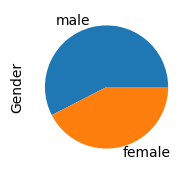

In [60]:
plt.figure(figsize=(3,2))
raw['Gender'].value_counts().plot(kind='pie')
plt.show()

* In this gender male has high value_counts 164. 

In [61]:
raw.Marital_Status.value_counts(),raw.Marital_Status.mode()

(single               189
 married               87
 prefer_not_to_say      9
 Name: Marital_Status, dtype: int64,
 0    single
 Name: Marital_Status, dtype: object)

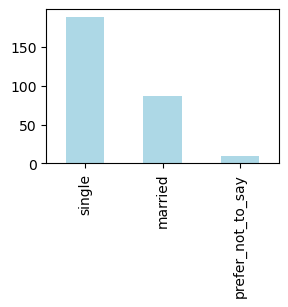

In [62]:
plt.figure(figsize=(3,2))
raw['Marital_Status'].value_counts().plot(kind='bar',color = 'lightblue')
plt.show()

* In marital_status singles have high value_counts with 189.  

In [63]:
raw.Occupation.value_counts(),raw.Occupation.mode()

(student           144
 employee           94
 self_employeed     38
 house_wife          9
 Name: Occupation, dtype: int64,
 0    student
 Name: Occupation, dtype: object)

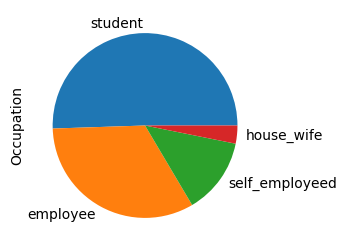

In [64]:
plt.figure(figsize=(4,3))
raw['Occupation'].value_counts().plot(kind='pie')
plt.show()

* In Occupation Students are very high with 144. 

In [65]:
raw.Monthly_Income.value_counts(),raw.Monthly_Income.mode()

(no_income           131
 high_income          52
 very_high_income     47
 moderate_income      36
 low_income           19
 Name: Monthly_Income, dtype: int64,
 0    no_income
 Name: Monthly_Income, dtype: object)

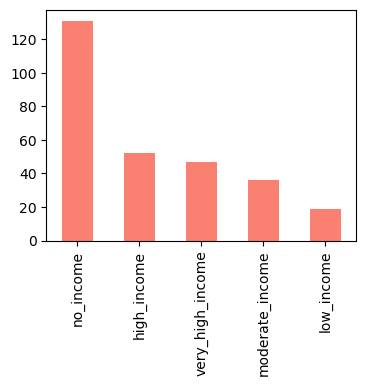

In [66]:
plt.figure(figsize=(4,3))
raw['Monthly_Income'].value_counts().plot(kind='bar', color = 'salmon')
plt.show()

* In monthly_income there are no_income has high value with 131.  

In [67]:
raw.Educational_Qualifications.value_counts(),raw.Educational_Qualifications.mode()

(graduate         126
 post_graduate    125
 ph_d              21
 school            11
 uneducated         2
 Name: Educational_Qualifications, dtype: int64,
 0    graduate
 Name: Educational_Qualifications, dtype: object)

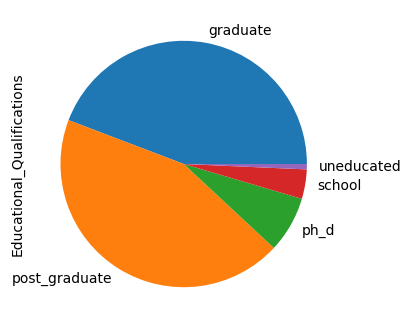

In [68]:
plt.figure(figsize=(5,4))
raw['Educational_Qualifications'].value_counts().plot(kind='pie')
plt.show()

* In Educational_Qualifications there are graduate are high with 126   

In [69]:
balanced_data.Output.value_counts(),balanced_data.Output.mode()

(yes    217
 no     217
 Name: Output, dtype: int64,
 0     no
 1    yes
 Name: Output, dtype: object)

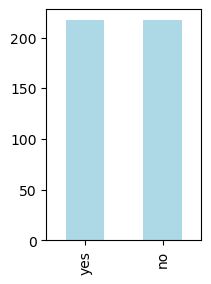

In [70]:
plt.figure(figsize=(2,3))
balanced_data['Output'].value_counts().plot(kind='bar',color = 'lightblue')
plt.show()

* In Output column we have balanced.

In [71]:
raw.Feedback.value_counts(),raw.Feedback.mode()

(positive    231
 negative     54
 Name: Feedback, dtype: int64,
 0    positive
 Name: Feedback, dtype: object)

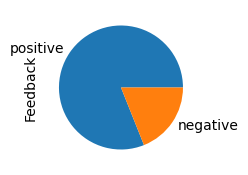

In [72]:
plt.figure(figsize=(2,3))
raw['Feedback'].value_counts().plot(kind='pie')
plt.show()

* In Feedback positive has high values with 231. 

In [73]:
raw.Area.value_counts(),raw.Area.mode()

(Gandhinagar          27
 Hoysala_Nagara       16
 Malleswaram          11
 Sadhashivanagar       9
 Agaram                9
                      ..
 K_R_Puram             1
 Dodda_Bidarakallu     1
 Hampi_Nagar           1
 Vasanth_Nagar         1
 Nagarabhavi           1
 Name: Area, Length: 71, dtype: int64,
 0    Gandhinagar
 Name: Area, dtype: object)

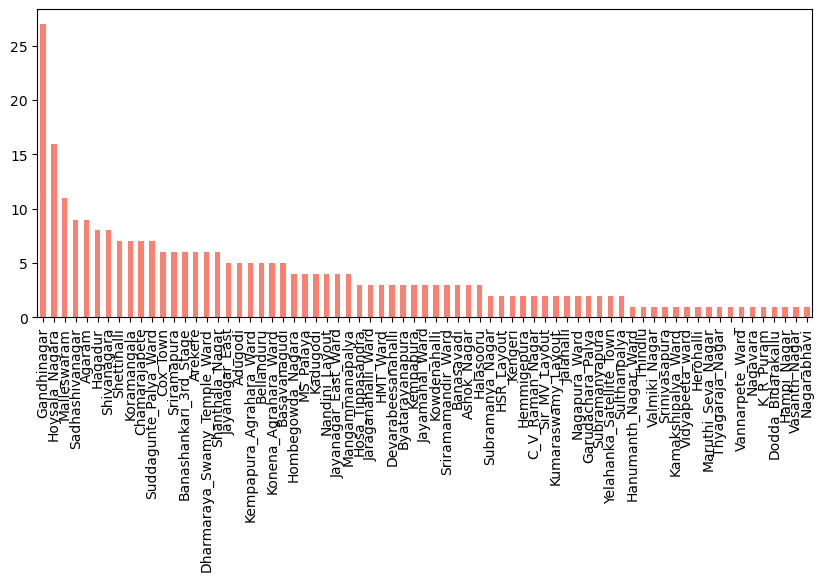

In [74]:
plt.figure(figsize=(10,4))
raw['Area'].value_counts().plot(kind='bar',color = 'salmon')
plt.show()

* In Area column Gandhinagar has high value with 27.   

In [75]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [76]:
# Each Column characteristics

from termcolor import colored
from simple_colors import *

for i in raw.columns:
    if raw[i].dtype == 'object':
        print()
        print(green("Categorical Column Characteristics:",['bold']))
        print(green("Column Name:"),i)
        print(raw[i].unique(), ":", raw[i].nunique())
        print(raw[i].value_counts())
        print("Mode:",raw[i].mode())
    elif raw[i].dtype == 'int32' or 'int64' or 'float64':
        print()
        print(blue("Numerical Column Characteristics:",['bold']))
        print(blue("Column Name:"),i)
        print(raw[i].describe())
        print(raw[i].mode())


Numerical Column Characteristics:
Column Name: Age
count    285.000000
mean      24.677193
std        3.040977
min       18.000000
25%       23.000000
50%       24.000000
75%       26.000000
max       33.000000
Name: Age, dtype: float64
0    23
Name: Age, dtype: int64

Categorical Column Characteristics:
Column Name: Gender
['female' 'male'] : 2
male      164
female    121
Name: Gender, dtype: int64
Mode: 0    male
Name: Gender, dtype: object

Categorical Column Characteristics:
Column Name: Marital_Status
['single' 'married' 'prefer_not_to_say'] : 3
single               189
married               87
prefer_not_to_say      9
Name: Marital_Status, dtype: int64
Mode: 0    single
Name: Marital_Status, dtype: object

Categorical Column Characteristics:
Column Name: Occupation
['student' 'employee' 'self_employeed' 'house_wife'] : 4
student           144
employee           94
self_employeed     38
house_wife          9
Name: Occupation, dtype: int64
Mode: 0    student
Name: Occupation, dtyp


Categorical/Numeric Discrete Column: Age
Uni-Variate Descriptive Stats:
Classes: [20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
Number of Classes: 16
Value Counts of each class: 23    47
25    41
22    40
24    37
26    27
21    18
27    16
28    12
32    12
30     8
20     7
31     7
29     7
19     4
18     1
33     1
Name: Age, dtype: int64
Class Percent:
23    16.491228
25    14.385965
22    14.035088
24    12.982456
26     9.473684
21     6.315789
27     5.614035
28     4.210526
32     4.210526
30     2.807018
20     2.456140
31     2.456140
29     2.456140
19     1.403509
18     0.350877
33     0.350877
Name: Age, dtype: float64
---------------------------------------------------
Mode Value: 23

Categorical/Numeric Discrete Column: Gender
Uni-Variate Descriptive Stats:
Classes: ['female' 'male']
Number of Classes: 2
Value Counts of each class: male      164
female    121
Name: Gender, dtype: int64
Class Percent:
male      57.54386
female    42.45614
Name: Gender, dtype: float

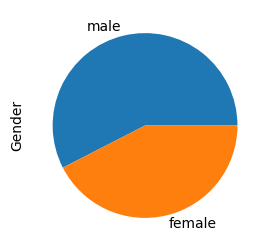


Categorical/Numeric Discrete Column: Marital_Status
Uni-Variate Descriptive Stats:
Classes: ['single' 'married' 'prefer_not_to_say']
Number of Classes: 3
Value Counts of each class: single               189
married               87
prefer_not_to_say      9
Name: Marital_Status, dtype: int64
Class Percent:
single               66.315789
married              30.526316
prefer_not_to_say     3.157895
Name: Marital_Status, dtype: float64
---------------------------------------------------
Mode Value: single

Visual Analysis:
-----------------------------------------------------


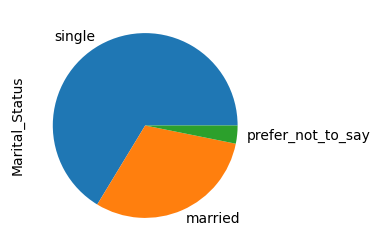


Categorical/Numeric Discrete Column: Occupation
Uni-Variate Descriptive Stats:
Classes: ['student' 'employee' 'self_employeed' 'house_wife']
Number of Classes: 4
Value Counts of each class: student           144
employee           94
self_employeed     38
house_wife          9
Name: Occupation, dtype: int64
Class Percent:
student           50.526316
employee          32.982456
self_employeed    13.333333
house_wife         3.157895
Name: Occupation, dtype: float64
---------------------------------------------------
Mode Value: student

Visual Analysis:
-----------------------------------------------------


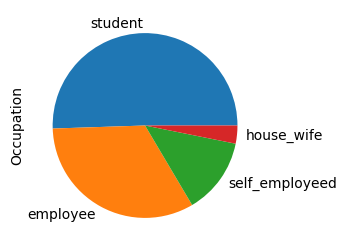


Categorical/Numeric Discrete Column: Monthly_Income
Uni-Variate Descriptive Stats:
Classes: ['no_income' 'low_income' 'very_high_income' 'moderate_income'
 'high_income']
Number of Classes: 5
Value Counts of each class: no_income           131
high_income          52
very_high_income     47
moderate_income      36
low_income           19
Name: Monthly_Income, dtype: int64
Class Percent:
no_income           45.964912
high_income         18.245614
very_high_income    16.491228
moderate_income     12.631579
low_income           6.666667
Name: Monthly_Income, dtype: float64
---------------------------------------------------
Mode Value: no_income

Visual Analysis:
-----------------------------------------------------


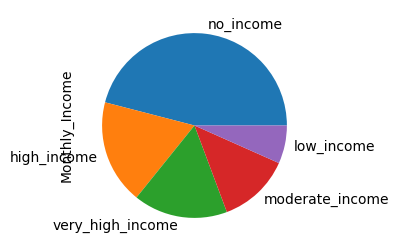


Categorical/Numeric Discrete Column: Educational_Qualifications
Uni-Variate Descriptive Stats:
Classes: ['post_graduate' 'graduate' 'ph_d' 'uneducated' 'school']
Number of Classes: 5
Value Counts of each class: graduate         126
post_graduate    125
ph_d              21
school            11
uneducated         2
Name: Educational_Qualifications, dtype: int64
Class Percent:
graduate         44.210526
post_graduate    43.859649
ph_d              7.368421
school            3.859649
uneducated        0.701754
Name: Educational_Qualifications, dtype: float64
---------------------------------------------------
Mode Value: graduate

Visual Analysis:
-----------------------------------------------------


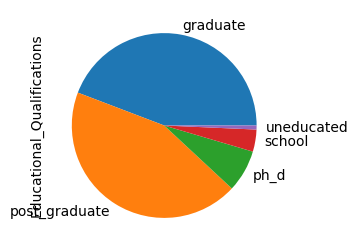


Categorical/Numeric Discrete Column: Family_size
Uni-Variate Descriptive Stats:
Classes: [4 3 6 2 5 1]
Number of Classes: 6
Value Counts of each class: 3    87
2    75
4    45
5    37
6    23
1    18
Name: Family_size, dtype: int64
Class Percent:
3    30.526316
2    26.315789
4    15.789474
5    12.982456
6     8.070175
1     6.315789
Name: Family_size, dtype: float64
---------------------------------------------------
Mode Value: 3

Visual Analysis:
-----------------------------------------------------


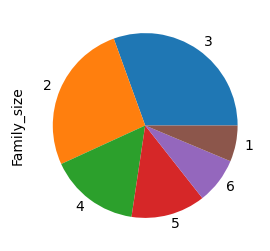


Categorical/Numeric Discrete Column: Pin_code
Uni-Variate Descriptive Stats:
Classes: [560001 560009 560017 560019 560010 560103 560042 560048 560078 560004
 560068 560038 560008 560032 560033 560021 560085 560050 560098 560003
 560066 560034 560102 560025 560026 560043 560002 560086 560076 560096
 560029 560046 560030 560024 560020 560028 560064 560036 560011 560061
 560022 560027 560007 560012 560006 560047 560005 560073 560016 560013
 560051 560015 560018 560109 560023 560104 560041 560049 560045 560055
 560060 560062 560070 560075 560080 560092 560095 560097 560093 560091
 560100 560079 560059 560067 560014 560056 560072]
Number of Classes: 77
Value Counts of each class: 560009    22
560038    11
560066     8
560010     8
560029     7
          ..
560045     1
560049     1
560051     1
560104     1
560072     1
Name: Pin_code, Length: 77, dtype: int64
Class Percent:
560009    7.719298
560038    3.859649
560066    2.807018
560010    2.807018
560029    2.456140
            ...   
56

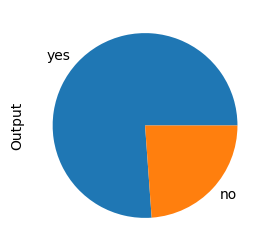


Categorical/Numeric Discrete Column: Feedback
Uni-Variate Descriptive Stats:
Classes: ['positive' 'negative']
Number of Classes: 2
Value Counts of each class: positive    231
negative     54
Name: Feedback, dtype: int64
Class Percent:
positive    81.052632
negative    18.947368
Name: Feedback, dtype: float64
---------------------------------------------------
Mode Value: positive

Visual Analysis:
-----------------------------------------------------


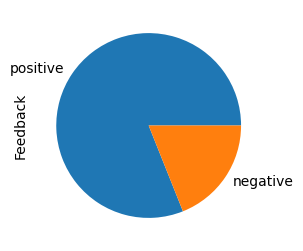


Categorical/Numeric Discrete Column: Area
Uni-Variate Descriptive Stats:
Classes: ['Shanthala_Nagar' 'Gandhinagar' 'Konena_Agrahara_Ward'
 'Hanumanth_Nagar_Ward' 'Shivanagara' 'Devarabeesanahalli' 'Halasooru'
 'Garudachara_Palya' 'Jaraganahalli_Ward' 'Basavanagudi' 'Mangammanapalya'
 'Hoysala_Nagara' 'Sulthanpalya' 'Maruthi_Seva_Nagar' 'Sriramapura'
 'Banashankari_3rd_Stage' 'Vidyapeeta_ward' 'Srinivasapura' 'Malleswaram'
 'Hagadur' 'Koramangala' 'HSR_Layout' 'Ashok_Nagar' 'Valmiki_Nagar'
 'Banasavadi' 'Dharmaraya_Swamy_Temple_Ward' 'Nagapura_Ward' 'Arekere'
 'Nandini_Layout' 'Suddagunte_Palya_Ward' 'Jayamahal_Ward' 'Adugodi'
 'Kempapura' 'Thyagaraja_Nagar' 'Yelahanka_Satellite_Town' 'Bellanduru'
 'Jayanagar_East' 'Subramanyapura' 'HMT_Ward' 'Hombegowda_Nagara' 'Agaram'
 'Sadhashivanagar' 'Vannarpete_Ward' 'Cox_Town' 'Dodda_Bidarakallu'
 'Kowdenahalli' 'Jalahalli' 'Vasanth_Nagar' 'Shettihalli' 'Chamarajapete'
 '_' 'Kempapura_Agrahara_Ward' 'Hampi_Nagar' 'Jayanagar_East_Ward'
 'K_R_Pur

In [77]:
from simple_colors import *

for i in raw.columns:
    if raw[i].dtype == 'object' or raw[i].dtype == 'int32' or raw[i].dtype == 'int64':
        print()
        print(cyan("Categorical/Numeric Discrete Column:", ['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:", ['bold']))
        print(black("Classes:", ['bold']), raw[i].unique())
        print(black("Number of Classes:", ['bold']), raw[i].nunique())
        print(black("Value Counts of each class:", ['bold']),raw[i].value_counts())
        print(black('Class Percent:', ['bold']))
        print((raw[i].value_counts() / raw[i].value_counts().sum()) * 100)
        print("---------------------------------------------------")
        print(black("Mode Value:", ['bold']), raw[i].mode()[0])
        if raw[i].nunique() <= 10:
            print()
            print(magenta("Visual Analysis:", ['bold']))
            print("-----------------------------------------------------")
            plt.figure(figsize=(8, 3))
            raw[i].value_counts().plot(kind='pie')
            plt.show()

    elif raw[i].dtype != 'object':
        print()
        print(blue("Numerical Column:", ['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:", ['bold']))
        print(round(raw[i].describe(), ))
        print("-----------------------------------------------------")
        print(black("Skewness & Kurtosis:", ['bold']), raw[i].skew(), ",",
              raw[i].kurt())
        print()
        print(cyan("Visual Analysis:", ['bold']))
        print("-----------------------------------------------------")
        plt.figure(figsize=(8, 6))
        sns.distplot(raw[i])
        
        #data[i].plot(kind = 'density')
        
        plt.show()

**Uni-Variate analysis**

**On Numerical columns**

In [78]:
raw['Age'].describe(),raw['Age'].skew(),raw['Age'].kurtosis()

(count    285.000000
 mean      24.677193
 std        3.040977
 min       18.000000
 25%       23.000000
 50%       24.000000
 75%       26.000000
 max       33.000000
 Name: Age, dtype: float64,
 0.7430766506943454,
 0.18885877289151143)

<Axes: title={'center': 'Boxplot of price'}, ylabel='Age'>

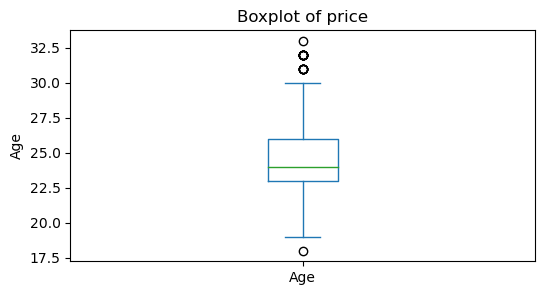

In [79]:
raw.Age.plot(kind='box',title='Boxplot of price',ylabel='Age',figsize=(6,3))

In [80]:
raw['Family_size'].describe(),raw['Family_size'].skew(),raw['Family_size'].kurtosis()

(count    285.000000
 mean       3.270175
 std        1.361178
 min        1.000000
 25%        2.000000
 50%        3.000000
 75%        4.000000
 max        6.000000
 Name: Family_size, dtype: float64,
 0.43711233822269807,
 -0.6276434829350501)

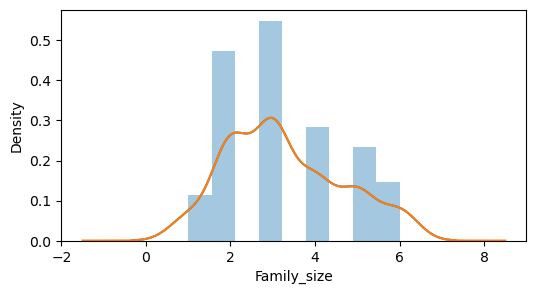

In [81]:
plt.figure(figsize=(6, 3))
sns.distplot(raw['Family_size'])
raw['Family_size'].plot(kind = 'density')
plt.show()

<Axes: ylabel='Density'>

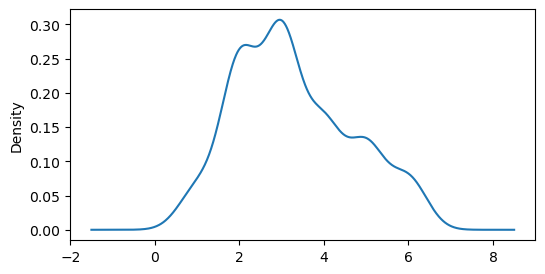

In [82]:
plt.figure(figsize=(6, 3))
raw.Family_size.plot(kind='density')

**Bi-Variate analysis on N-N**

**Data Study between two columns**

**Numerical to Numerical**

In [83]:
raw.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Area
0,20,female,single,student,no_income,post_graduate,4,560001,yes,positive,Shanthala_Nagar
1,24,female,single,student,low_income,graduate,3,560009,yes,positive,Gandhinagar
2,22,male,single,student,low_income,post_graduate,3,560017,yes,negative,Konena_Agrahara_Ward
3,22,female,single,student,no_income,graduate,6,560019,yes,positive,Hanumanth_Nagar_Ward
4,22,male,single,student,low_income,post_graduate,4,560010,yes,positive,Shivanagara


In [84]:
raw.corr()

,Age,Family_size,Pin_code
Age,1.000000,0.212541,0.051374
Family_size,0.212541,1.000000,0.015686
Pin_code,0.051374,0.015686,1.000000


<Axes: >

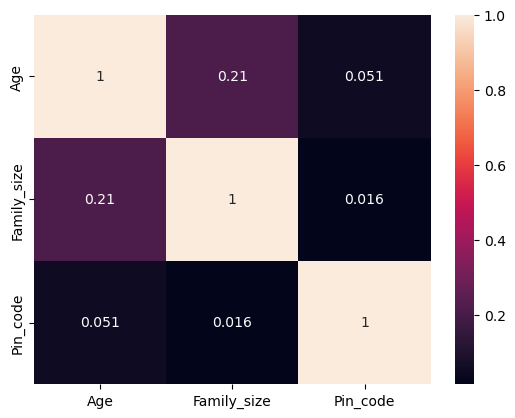

In [85]:
sns.heatmap(raw.corr(),annot = True)

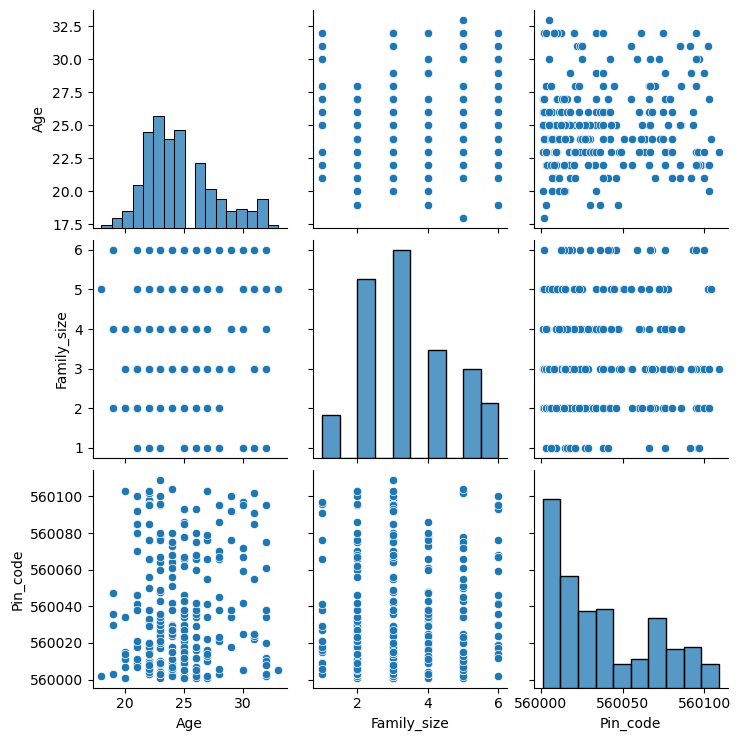

In [86]:
sns.pairplot(raw.iloc[0:500])

**Numerical to Categorical**

In [87]:
raw.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Area
0,20,female,single,student,no_income,post_graduate,4,560001,yes,positive,Shanthala_Nagar
1,24,female,single,student,low_income,graduate,3,560009,yes,positive,Gandhinagar
2,22,male,single,student,low_income,post_graduate,3,560017,yes,negative,Konena_Agrahara_Ward
3,22,female,single,student,no_income,graduate,6,560019,yes,positive,Hanumanth_Nagar_Ward
4,22,male,single,student,low_income,post_graduate,4,560010,yes,positive,Shivanagara


In [88]:
((raw.groupby("Monthly_Income")['Age'].mean()/len(raw))*100).sort_values(ascending  = False)

Monthly_Income
very_high_income    9.585666
high_income         9.197031
moderate_income     8.674464
low_income          8.328717
no_income           8.155886
Name: Age, dtype: float64

<Axes: ylabel='Monthly_Income'>

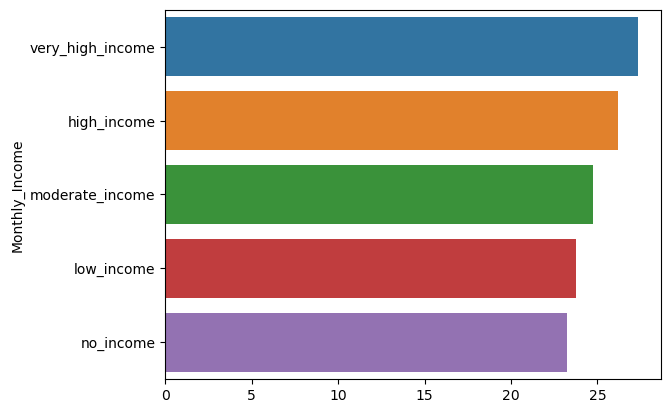

In [89]:
sns.barplot(y = raw.groupby('Monthly_Income')['Age'].mean().sort_values(ascending=False).index[0:5],
            x = raw.groupby('Monthly_Income')['Age'].mean().sort_values(ascending=False).values[0:5],orient ='h')

In [90]:
((raw.groupby("Occupation")['Family_size'].mean()/len(raw))*100).sort_values(ascending  = False)

Occupation
house_wife        1.676413
self_employeed    1.255771
employee          1.138485
student           1.091618
Name: Family_size, dtype: float64

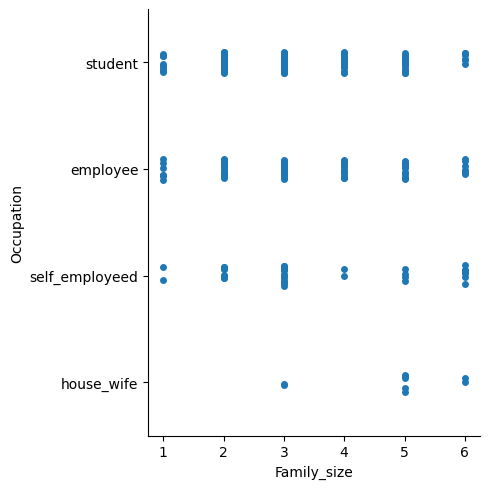

In [91]:
sns.catplot(y='Occupation', x ='Family_size', data = raw, orient='h')

In [92]:
((raw.groupby('Area')['Age'].mean()/len(raw))*100).sort_values(ascending  = False)

Area
Herohalli               10.877193
Nagarabhavi             10.526316
Thindlu                 10.526316
Subramanya_Nagar        10.175439
HMT_Ward                10.058480
                          ...    
Srinivasapura            7.719298
Maruthi_Seva_Nagar       7.719298
Hanumanth_Nagar_Ward     7.719298
Vidyapeeta_ward          7.719298
Vannarpete_Ward          6.666667
Name: Age, Length: 71, dtype: float64

<Axes: ylabel='Area'>

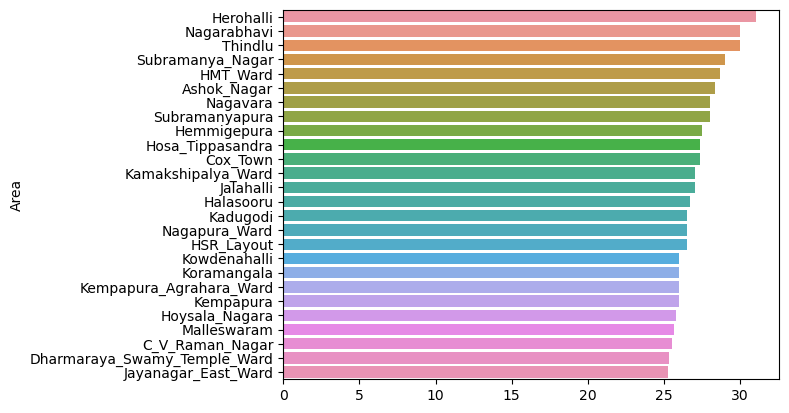

In [93]:
sns.barplot(y = raw.groupby('Area')['Age'].mean().sort_values(ascending=False).index[0:26],
            x = raw.groupby('Area')['Age'].mean().sort_values(ascending=False).values[0:26],orient ='h')

**Categorical to Categorical**

In [94]:
raw.head(2)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Area
0,20,female,single,student,no_income,post_graduate,4,560001,yes,positive,Shanthala_Nagar
1,24,female,single,student,low_income,graduate,3,560009,yes,positive,Gandhinagar


In [95]:
pd.crosstab(raw.Occupation,raw.Output,margins=True)

Output,no,yes,All
Occupation,,,
employee,34,60,94
house_wife,2,7,9
self_employeed,14,24,38
student,18,126,144
All,68,217,285


<Axes: xlabel='count', ylabel='Output'>

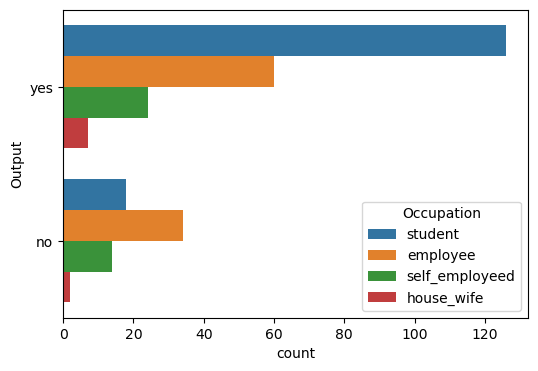

In [96]:
plt.figure(figsize=(6,4))
sns.countplot(y='Output', hue='Occupation', data = raw)

In [97]:
pd.crosstab(raw.Output,raw.Monthly_Income,margins=True)

Monthly_Income,high_income,low_income,moderate_income,no_income,very_high_income,All
Output,,,,,,
no,19,4,9,19,17,68
yes,33,15,27,112,30,217
All,52,19,36,131,47,285


<Axes: xlabel='count', ylabel='Output'>

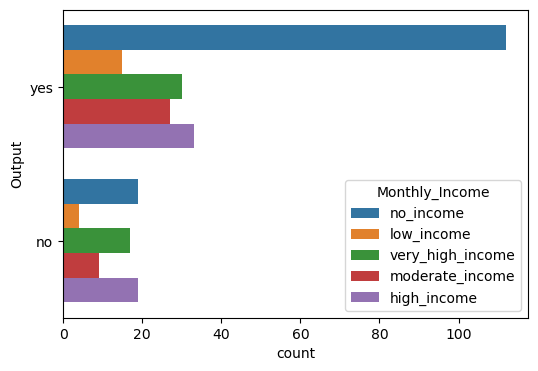

In [98]:
plt.figure(figsize=(6,4))
sns.countplot(y='Output', hue='Monthly_Income', data = raw)

In [99]:
pd.crosstab(raw.Output,raw.Educational_Qualifications, margins=True)

Educational_Qualifications,graduate,ph_d,post_graduate,school,uneducated,All
Output,,,,,,
no,37,7,21,2,1,68
yes,89,14,104,9,1,217
All,126,21,125,11,2,285


<Axes: xlabel='Output', ylabel='count'>

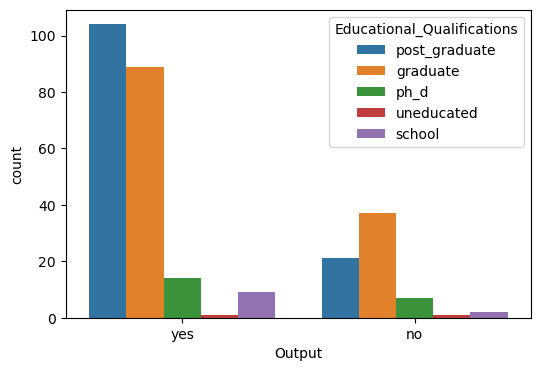

In [100]:
plt.figure(figsize=(6,4))
sns.countplot(x='Output', hue='Educational_Qualifications', data = raw)

In [101]:
raw.head(5)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Area
0,20,female,single,student,no_income,post_graduate,4,560001,yes,positive,Shanthala_Nagar
1,24,female,single,student,low_income,graduate,3,560009,yes,positive,Gandhinagar
2,22,male,single,student,low_income,post_graduate,3,560017,yes,negative,Konena_Agrahara_Ward
3,22,female,single,student,no_income,graduate,6,560019,yes,positive,Hanumanth_Nagar_Ward
4,22,male,single,student,low_income,post_graduate,4,560010,yes,positive,Shivanagara


###  Handling Missing Values & Outliers 

No missing values present in our data

In [102]:
raw.isnull().sum()

Age                           0
Gender                        0
Marital_Status                0
Occupation                    0
Monthly_Income                0
Educational_Qualifications    0
Family_size                   0
Pin_code                      0
Output                        0
Feedback                      0
Area                          0
dtype: int64

### Outlier detection

In [103]:
def outlier_detect(df):
    for i in df.describe().columns:
        print("Column:",i)
        print("------------------------------------------------")
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        print("Lower Outliers:")
        print()
        lowerout = list(df[df[i]<LTV][i])
        lowerout.sort()
        print(lowerout)
        print()        
        print("Upper Outliers:")
        print()
        upperout = list(df[df[i]>UTV][i])
        upperout.sort()
        print(upperout) 
        print()

In [104]:
outlier_detect(raw)

Column: Age
------------------------------------------------
Lower Outliers:

[18]

Upper Outliers:

[31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33]

Column: Family_size
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]

Column: Pin_code
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]



In [105]:
def outlier_replacement(df):
    for i in df.describe().columns:
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        
        # replacement vals
        median = df[i].median()
        low_bound = LTV
        high_bound = UTV
        fifth = df[i].quantile(0.05)
        ninetyfifth = df[i].quantile(0.95)
        
        # mask method is used to replace the values
        df[i] = df[i].mask(df[i]<LTV, low_bound) # replacing the outlier with ltv (25% value)
        df[i] = df[i].mask(df[i]>UTV, high_bound) # replacing the outlier with utv (75% value)

In [106]:
outlier_replacement(raw)

<Axes: >

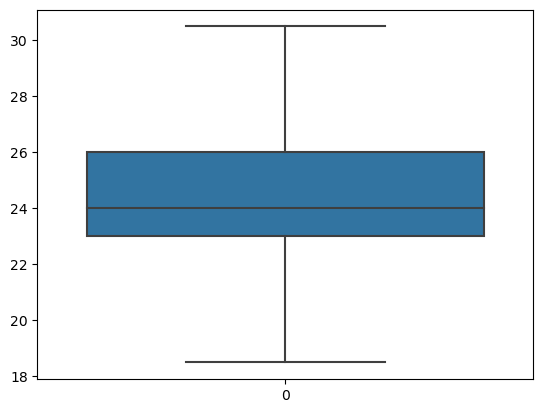

In [107]:
sns.boxplot(raw.Age)

### Predictive Modeling
    
* Above data will be given to a machine learning model, where the model will be trained on column data output with other columns data.     
    
* predictive modeling is sending data to a algorithm as input columns(x) along with one output column data (y), training y data with x
    
    model: y~x -> y = f(x)+e

### X & y
* This is the method where to identify according to business goal,output as y and x as input column 

In [108]:
x = raw.drop('Output', axis = 1) # input column
y = raw['Output']                # output column

In [109]:
x.head(2)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area
0,20.0,female,single,student,no_income,post_graduate,4,560001,positive,Shanthala_Nagar
1,24.0,female,single,student,low_income,graduate,3,560009,positive,Gandhinagar


In [110]:
y.head(2)

0    yes
1    yes
Name: Output, dtype: object

### Train-Test Split

* Dividing Data (x,y) into train and test (Data Validation)

* for this we will use sklearn module
* we can go with 70,30 or 80,20 or 75,25 ratios

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=42)

In [113]:
# Index Reset

xtrain = xtrain.reset_index(drop=True)
ytrain = ytrain.reset_index(drop=True)
xtest = xtest.reset_index(drop=True)
ytest = ytest.reset_index(drop=True)

In [114]:
xtrain.shape, xtest.shape

((213, 10), (72, 10))

In [115]:
ytrain.shape, ytest.shape

((213,), (72,))

In [116]:
xtrain.head(2)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area
0,21.0,male,single,student,no_income,graduate,3,560092,negative,Byatarayanapura
1,23.0,male,single,student,no_income,post_graduate,2,560076,positive,Arekere


In [117]:
xtest.head(2)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area
0,23.0,female,single,student,no_income,post_graduate,4,560048,positive,Garudachara_Palya
1,25.0,male,married,self_employeed,high_income,graduate,3,560027,positive,Hombegowda_Nagara


xtrain, ytrain data is used for the training predictive model

xtest is used for the predictions, ytest is used for the comparissions

###  Data Pre-Processing

**Categorical to Numerical (Encoding)**

Machine needs data in numeric format, so we need to convert categorical to numerical, while observing the number of classes , because it will increase the dimensionality if we are converting them to one hot encoding.

* Ordinal Encoding for ordinal
    - lets assume cat column data : platinum, gold, silver
    - ordinal - platinum  >  gold  >  silver
                   3      >   2    >    1
                   
* One hot encoding for nominal
    - lets assume cat column data: a, b, c

a|b|c
--|--|--
1|0|0
1|0|0
0|1|0
0|0|1

**Label encoding**
* Here we are giving manually without using label encoder function.

In [118]:
xtest.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area
0,23.0,female,single,student,no_income,post_graduate,4,560048,positive,Garudachara_Palya
1,25.0,male,married,self_employeed,high_income,graduate,3,560027,positive,Hombegowda_Nagara
2,25.0,female,married,self_employeed,high_income,post_graduate,3,560018,positive,Chamarajapete
3,24.0,female,single,self_employeed,high_income,post_graduate,3,560080,negative,Sadhashivanagar
4,23.0,male,single,student,no_income,post_graduate,3,560029,positive,Suddagunte_Palya_Ward


**Gender**
* Marital_status is replaced with the order of

            female   >    male
               0     >     1 

In [119]:
xtrain.Gender.unique()

array(['male', 'female'], dtype=object)

In [120]:
xtest.Gender.unique()

array(['female', 'male'], dtype=object)

In [121]:
xtrain.Gender.replace({'female':0,'male':1},inplace=True)
xtest.Gender.replace({'female':0,'male':1},inplace=True)

**Marital_status**
* Marital_status is replaced with the order of

        single   >   married  >    prefer_not_to_say  
         1       >      2      >        3   

In [122]:
display(xtrain.Marital_Status.unique())
xtest.Marital_Status.unique()

array(['single', 'married', 'prefer_not_to_say'], dtype=object)

array(['single', 'married', 'prefer_not_to_say'], dtype=object)

In [123]:
xtrain.Marital_Status.replace({'single':1,'married':2,'prefer_not_to_say':3},inplace=True)
xtest.Marital_Status.replace({'single':1,'married':2,'prefer_not_to_say':3},inplace=True)

**Occupation**
* Occupation is replaced with the order of

        student > employee > self_employeed > house_wife 
         1      >     2    >      3         >     4  

In [124]:
display(xtrain.Occupation.unique())
xtest.Occupation.unique()

array(['student', 'employee', 'self_employeed', 'house_wife'],
      dtype=object)

array(['student', 'self_employeed', 'employee', 'house_wife'],
      dtype=object)

In [125]:
xtrain.Occupation.replace({'student':1,'employee':2,'self_employeed':3,'house_wife':4},inplace=True)
xtest.Occupation.replace({'student':1,'employee':2,'self_employeed':3,'house_wife':4},inplace=True)

**Monthly_income**
* Monthly_Income is replaced with the order of

        no_income > low_income > moderate_income > high_income > very_high_income  
           1      >     2      >      3          >     4       >        5 

In [126]:
display(xtrain.Monthly_Income.unique())
xtest.Monthly_Income.unique()

array(['no_income', 'very_high_income', 'moderate_income', 'low_income',
       'high_income'], dtype=object)

array(['no_income', 'high_income', 'very_high_income', 'low_income',
       'moderate_income'], dtype=object)

In [127]:
xtrain.Monthly_Income.replace({'no_income':1,'low_income':2,'moderate_income':3,'high_income':4,'very_high_income':5},inplace=True)
xtest.Monthly_Income.replace({'no_income':1,'low_income':2,'moderate_income':3,'high_income':4,'very_high_income':5},inplace=True)

In [128]:
xtrain.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area
0,21.0,1,1,1,1,graduate,3,560092,negative,Byatarayanapura
1,23.0,1,1,1,1,post_graduate,2,560076,positive,Arekere
2,19.0,1,1,1,1,graduate,2,560003,negative,Malleswaram
3,25.0,1,2,2,5,ph_d,3,560085,positive,Banashankari_3rd_Stage
4,25.0,1,1,2,3,graduate,2,560023,positive,Kempapura_Agrahara_Ward


**Educational_Qualifications**
* Educational_Qualifications is replaced with the order of

        Uneducated > School > Graduate > Post-graduate > Ph.D  
           1      >    2    >    3     >     4         >   5 

In [129]:
display(xtrain.Educational_Qualifications.unique())
xtest.Educational_Qualifications.unique()

array(['graduate', 'post_graduate', 'ph_d', 'school', 'uneducated'],
      dtype=object)

array(['post_graduate', 'graduate', 'ph_d', 'school', 'uneducated'],
      dtype=object)

In [130]:
xtrain.Educational_Qualifications.replace({'uneducated':1,'school':2,'graduate':3,'post_graduate':4,'ph_d':5},inplace=True)
xtest.Educational_Qualifications.replace({'uneducated':1,'school':2,'graduate':3,'post_graduate':4,'ph_d':5},inplace=True)

**Feedback**

In [131]:
xtrain.replace({'positive':1,'negative':0}, inplace = True)
xtest.replace({'positive':1,'negative':0}, inplace = True)

In [132]:
display(xtrain.shape)
xtest.shape

(213, 10)

(72, 10)

In [133]:
display(xtrain.head())
xtest.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area
0,21.0,1,1,1,1,3,3,560092,0,Byatarayanapura
1,23.0,1,1,1,1,4,2,560076,1,Arekere
2,19.0,1,1,1,1,3,2,560003,0,Malleswaram
3,25.0,1,2,2,5,5,3,560085,1,Banashankari_3rd_Stage
4,25.0,1,1,2,3,3,2,560023,1,Kempapura_Agrahara_Ward


,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area
0,23.0,0,1,1,1,4,4,560048,1,Garudachara_Palya
1,25.0,1,2,3,4,3,3,560027,1,Hombegowda_Nagara
2,25.0,0,2,3,4,4,3,560018,1,Chamarajapete
3,24.0,0,1,3,4,4,3,560080,0,Sadhashivanagar
4,23.0,1,1,1,1,4,3,560029,1,Suddagunte_Palya_Ward


In [134]:
display(xtrain.reset_index(drop=True))
xtest.reset_index(drop=True)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area
0,21.0,1,1,1,1,3,3,560092,0,Byatarayanapura
1,23.0,1,1,1,1,4,2,560076,1,Arekere
2,19.0,1,1,1,1,3,2,560003,0,Malleswaram
3,25.0,1,2,2,5,5,3,560085,1,Banashankari_3rd_Stage
4,25.0,1,1,2,3,3,2,560023,1,Kempapura_Agrahara_Ward
...,...,...,...,...,...,...,...,...,...,...
208,25.0,1,1,3,3,3,3,560043,1,Banasavadi
209,22.0,0,1,1,1,4,3,560009,1,Gandhinagar
210,26.0,0,1,3,4,4,3,560002,1,Dharmaraya_Swamy_Temple_Ward
211,25.0,0,3,2,4,4,3,560005,0,Cox_Town


,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area
0,23.0,0,1,1,1,4,4,560048,1,Garudachara_Palya
1,25.0,1,2,3,4,3,3,560027,1,Hombegowda_Nagara
2,25.0,0,2,3,4,4,3,560018,1,Chamarajapete
3,24.0,0,1,3,4,4,3,560080,0,Sadhashivanagar
4,23.0,1,1,1,1,4,3,560029,1,Suddagunte_Palya_Ward
...,...,...,...,...,...,...,...,...,...,...
67,22.0,0,1,1,1,4,5,560010,1,Shivanagara
68,24.0,1,3,3,5,5,2,560006,1,Sadhashivanagar
69,30.5,0,3,4,1,3,5,560008,0,Hoysala_Nagara
70,28.0,0,1,2,4,4,2,560038,1,Hoysala_Nagara


In [135]:
xtrain.dtypes

Age                           float64
Gender                          int64
Marital_Status                  int64
Occupation                      int64
Monthly_Income                  int64
Educational_Qualifications      int64
Family_size                     int64
Pin_code                        int64
Feedback                        int64
Area                           object
dtype: object

**One-Hot encoding**

In [136]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore',drop = 'first')

# drop is used remove one onehotencoded column for dummy_variable trap

In [137]:
xtrain.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area
0,21.0,1,1,1,1,3,3,560092,0,Byatarayanapura
1,23.0,1,1,1,1,4,2,560076,1,Arekere
2,19.0,1,1,1,1,3,2,560003,0,Malleswaram
3,25.0,1,2,2,5,5,3,560085,1,Banashankari_3rd_Stage
4,25.0,1,1,2,3,3,2,560023,1,Kempapura_Agrahara_Ward


**Train**

In [138]:
ohedata = ohe.fit_transform(xtrain.select_dtypes('object')).toarray()

In [139]:
ohedata.shape

(213, 64)

In [140]:
# Converting the one hot data to a data frame with col names

ohedata = pd.DataFrame(ohedata, columns = ohe.get_feature_names_out())

In [141]:
ohedata.head()

,Area_Agaram,Area_Arekere,Area_Ashok_Nagar,Area_Banasavadi,Area_Banashankari_3rd_Stage,Area_Basavanagudi,Area_Bellanduru,Area_Byatarayanapura,Area_C_V_Raman_Nagar,Area_Chamarajapete,...,Area_Suddagunte_Palya_Ward,Area_Sulthanpalya,Area_Thindlu,Area_Thyagaraja_Nagar,Area_Valmiki_Nagar,Area_Vannarpete_Ward,Area_Vasanth_Nagar,Area_Vidyapeeta_ward,Area_Yelahanka_Satellite_Town,Area__
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
xtrain.drop(['Area'], axis = 1).head(2)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback
0,21.0,1,1,1,1,3,3,560092,0
1,23.0,1,1,1,1,4,2,560076,1


In [143]:
# Adding to xtrain data

xtrain = pd.concat([xtrain.drop(['Area'], axis = 1).reset_index(drop=True), ohedata], axis = 1)

xtrain.shape

(213, 73)

**xtest**

In [144]:
ohedata_test = ohe.transform(xtest.select_dtypes('object')).toarray()

In [145]:
# Converting the one hot data to a data frame with col names

ohedata_test = pd.DataFrame(ohedata_test, columns = ohe.get_feature_names_out())

In [146]:
# Adding to xtest data
xtest = pd.concat([xtest.drop(['Area'], axis = 1).reset_index(drop=True), ohedata_test], axis = 1)

xtest.shape

(72, 73)

In [147]:
xtrain.head(2)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area_Agaram,...,Area_Suddagunte_Palya_Ward,Area_Sulthanpalya,Area_Thindlu,Area_Thyagaraja_Nagar,Area_Valmiki_Nagar,Area_Vannarpete_Ward,Area_Vasanth_Nagar,Area_Vidyapeeta_ward,Area_Yelahanka_Satellite_Town,Area__
0,21.0,1,1,1,1,3,3,560092,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23.0,1,1,1,1,4,2,560076,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
xtest.head(2)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area_Agaram,...,Area_Suddagunte_Palya_Ward,Area_Sulthanpalya,Area_Thindlu,Area_Thyagaraja_Nagar,Area_Valmiki_Nagar,Area_Vannarpete_Ward,Area_Vasanth_Nagar,Area_Vidyapeeta_ward,Area_Yelahanka_Satellite_Town,Area__
0,23.0,0,1,1,1,4,4,560048,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,1,2,3,4,3,3,560027,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
xtrain.describe()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area_Agaram,...,Area_Suddagunte_Palya_Ward,Area_Sulthanpalya,Area_Thindlu,Area_Thyagaraja_Nagar,Area_Valmiki_Nagar,Area_Vannarpete_Ward,Area_Vasanth_Nagar,Area_Vidyapeeta_ward,Area_Yelahanka_Satellite_Town,Area__
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,...,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,24.631455,0.577465,1.380282,1.676056,2.507042,3.507042,3.305164,560037.704225,0.798122,0.028169,...,0.018779,0.009390,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.009390,0.004695
std,2.911687,0.495126,0.532869,0.808702,1.588935,0.704565,1.347892,30.932852,0.402347,0.165845,...,0.136065,0.096672,0.068519,0.068519,0.068519,0.068519,0.068519,0.068519,0.096672,0.068519
min,18.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,560001.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,1.000000,1.000000,1.000000,3.000000,2.000000,560010.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,560028.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.000000,1.000000,2.000000,2.000000,4.000000,4.000000,4.000000,560064.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.500000,1.000000,3.000000,4.000000,5.000000,5.000000,6.000000,560109.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Scaling
We need to apply scaling for the input numerical continuous columns which are in different scales only ,not to the one hot encoded vectors

Whenever we apply data for linear models we will can go with scaling part

* We have two scales
    - Standard Scale     -3 to +3
    - Min Max Scale       -1 to +1 

In [150]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [151]:
xtrain.iloc[:,[7]]

,Pin_code
0,560092
1,560076
2,560003
3,560085
4,560023
...,...
208,560043
209,560009
210,560002
211,560005


In [152]:
# Fit on train

xtrain.iloc[:,[7]] = sc.fit_transform(xtrain.iloc[:,[7]])

# Transform on test

xtest.iloc[:,[7]] = sc.transform(xtest.iloc[:,[7]])

In [153]:
display(xtrain.head())
xtest.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area_Agaram,...,Area_Suddagunte_Palya_Ward,Area_Sulthanpalya,Area_Thindlu,Area_Thyagaraja_Nagar,Area_Valmiki_Nagar,Area_Vannarpete_Ward,Area_Vasanth_Nagar,Area_Vidyapeeta_ward,Area_Yelahanka_Satellite_Town,Area__
0,21.0,1,1,1,1,3,3,1.759414,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23.0,1,1,1,1,4,2,1.240946,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19.0,1,1,1,1,3,2,-1.124564,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.0,1,2,2,5,5,3,1.532584,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25.0,1,1,2,3,3,2,-0.476479,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area_Agaram,...,Area_Suddagunte_Palya_Ward,Area_Sulthanpalya,Area_Thindlu,Area_Thyagaraja_Nagar,Area_Valmiki_Nagar,Area_Vannarpete_Ward,Area_Vasanth_Nagar,Area_Vidyapeeta_ward,Area_Yelahanka_Satellite_Town,Area__
0,23.0,0,1,1,1,4,4,0.333627,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,1,2,3,4,3,3,-0.346862,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.0,0,2,3,4,4,3,-0.638501,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24.0,0,1,3,4,4,3,1.370563,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23.0,1,1,1,1,4,3,-0.282054,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 8. Modeling<a id='model'>

[Back to Top](#menu)

* y data is a categorical binary data , we will be using ML Supervised classification algorithms

    - Logistic Regression
    - Knearest Neighbors (KNN)
    - Support Vector Machine (SVM)
    - Naive Bayes (NB)
    - Decision Trees (CART)
    - Random Forest (Bagging)
    - Xgboost (Boosting)

**Importing Libraries and Define Models**

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [155]:
# Model Define

log = LogisticRegression()

knn = KNeighborsClassifier(n_neighbors=5, p=2)

# Here neighbors are the hyperparameter
# Distance is the another hyperparameter (p) 2 for euclidean distance

dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# criteria is the root node selection method
# max_depth is the number of subtrees in decision  tree - main Hyperparameter

rf = RandomForestClassifier(n_estimators = 2, max_depth = 2, criterion = 'entropy', bootstrap = True)

# n_estimators are number of decision trees - Hyper parameter


sv = SVC(kernel = 'rbf', gamma=5) # for a non-linear seperable data

# Gamma=Sigma=coeffient for the rbf kernel - hyperparameter

#Kernel linear-- Linear SVM

#sv = SVC(kernel="linear") # for a linear separable data

nb = GaussianNB()

xgb = XGBClassifier(n_estimators=10,reg_alpha=0.5)

**Model Training**

* Using xtrain, ytrain data
* Using fit command to train the defined model with xtrain, ytrain

#### Logistic Regression

It uses the Linear Regression line to convert it into a sigmoid curve with the logit function output as probability of class

    prob = 1/1+e^-y
    
    if prob>0.5 1 
    else 0

Learning/Training Model on train data

we can use **fit** function in model for xtrain and ytrain data to train our data for getting the line co-efficients

In [156]:
log.fit(xtrain, ytrain)

LogisticRegression()

Parameters

In [157]:
log.intercept_

array([0.55499343])

In [158]:
log.coef_

array([[-5.53070231e-02,  4.33078380e-01, -7.62431799e-01,
         3.58168944e-01, -1.18981705e-01,  3.22218353e-01,
        -9.28805398e-02,  1.00182554e-01,  2.53916351e+00,
        -5.40514752e-01,  2.89528123e-01,  8.61274759e-01,
         2.53663507e-01,  2.68093507e-01,  3.65133137e-01,
         2.88928737e-01,  6.03718732e-02, -1.77968587e-01,
         1.50392804e-01,  1.37230915e-01,  5.60841740e-02,
         7.19444559e-01,  8.54330898e-02, -1.30798430e-01,
         9.81837583e-02, -4.33654177e-01,  1.74789969e-01,
        -1.26893939e+00, -1.01664990e+00,  5.81311395e-02,
         1.38240644e-01, -1.81008225e-02,  2.39773347e-01,
         2.84111407e-04,  8.63347687e-01,  5.22377146e-01,
        -1.11137393e+00,  2.12117822e-01, -8.96881167e-01,
         7.38698394e-02,  1.07925481e-01,  3.17195843e-01,
        -1.62593263e-01, -1.30964753e+00,  3.88798030e-01,
         2.70587596e-01,  3.30944361e-01, -3.15417264e-01,
        -3.38091291e-01, -5.77034305e-02,  2.40202664e-0

#### KNN

Knearest Neighbors

It will take the nearest data points using euclidean distance metric with number of k given

It is a lazy algorithm , it wont train the data instead it will store the data

It will do the training when test data given

In [159]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [160]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Decision Regions Plotting

In [161]:
xtrain.head(2)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Area_Agaram,...,Area_Suddagunte_Palya_Ward,Area_Sulthanpalya,Area_Thindlu,Area_Thyagaraja_Nagar,Area_Valmiki_Nagar,Area_Vannarpete_Ward,Area_Vasanth_Nagar,Area_Vidyapeeta_ward,Area_Yelahanka_Satellite_Town,Area__
0,21.0,1,1,1,1,3,3,1.759414,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23.0,1,1,1,1,4,2,1.240946,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
x_d = xtrain[['Gender','Feedback']]
y_d = ytrain

In [163]:
y_d

0      yes
1      yes
2       no
3      yes
4      yes
      ... 
208    yes
209    yes
210    yes
211     no
212    yes
Name: Output, Length: 213, dtype: object

In [164]:
y_d = np.where(y_d =='yes',1,0)

In [165]:
knn1 = KNeighborsClassifier(n_neighbors = 5, p=2)
knn1.fit(x_d,y_d)

KNeighborsClassifier()

In [166]:
!pip install mlxtend

In [167]:
from mlxtend.plotting import plot_decision_regions

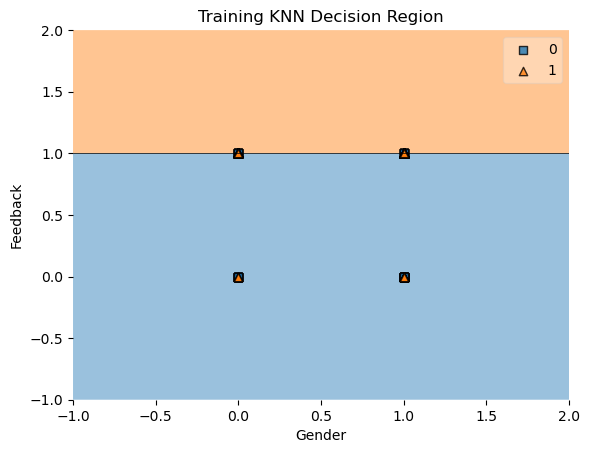

In [168]:
plot_decision_regions(np.array(x_d),np.array(y_d),clf=knn1)
plt.title("Training KNN Decision Region")
plt.xlabel("Gender")
plt.ylabel("Feedback")
plt.show()

We can tune k value using gridsearch cv to get best params

#### Decision Tree

Logic Tree based predictions based on root and interior nodes, branches

In [169]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

**Feature Importance**

In [170]:
pd.DataFrame(index = dt.feature_names_in_,data = dt.feature_importances_, columns = ['FeatureImportance'])

,FeatureImportance
Age,0.110877
Gender,0.000000
Marital_Status,0.000000
Occupation,0.000000
Monthly_Income,0.045404
...,...
Area_Vannarpete_Ward,0.000000
Area_Vasanth_Nagar,0.000000
Area_Vidyapeeta_ward,0.000000
Area_Yelahanka_Satellite_Town,0.000000


**Tree**

In [171]:
from sklearn.tree import plot_tree

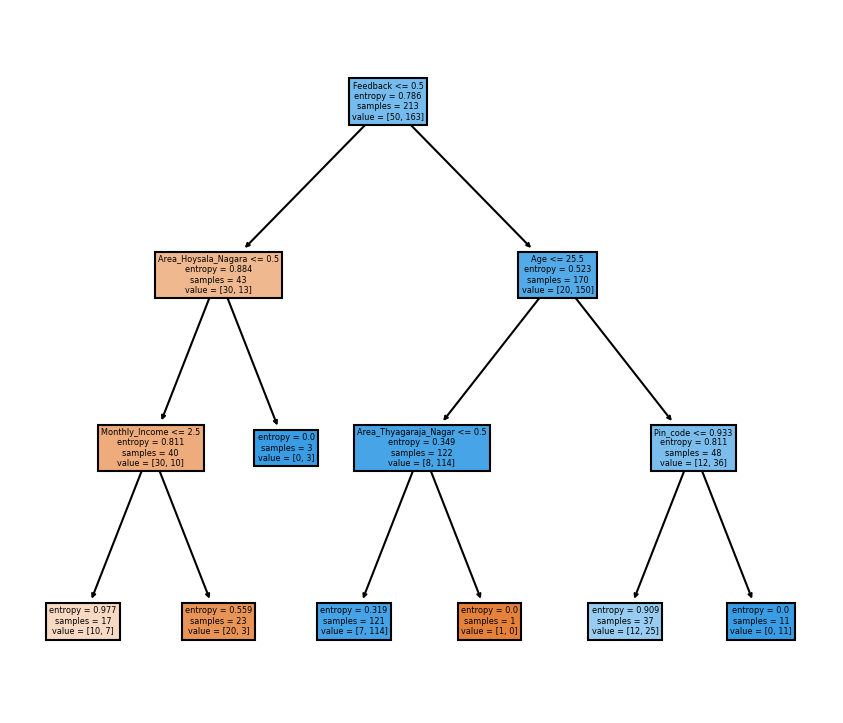

In [172]:
plt.figure(figsize=(7, 6), dpi=150)
plot_tree(dt, filled=True, feature_names=list(xtrain.columns))
plt.show()

#### Random Forest

Bagging algorithm which was a combination of Multiple Decision Trees

In [173]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=2)

In [174]:
pd.DataFrame(index = rf.feature_names_in_,data = rf.feature_importances_, columns = ['FeatureImportance'])

,FeatureImportance
Age,0.0
Gender,0.0
Marital_Status,0.0
Occupation,0.0
Monthly_Income,0.0
...,...
Area_Vannarpete_Ward,0.0
Area_Vasanth_Nagar,0.0
Area_Vidyapeeta_ward,0.0
Area_Yelahanka_Satellite_Town,0.0


Trees

In [175]:
rf.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                        random_state=1220155015),
 DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                        random_state=58924785)]

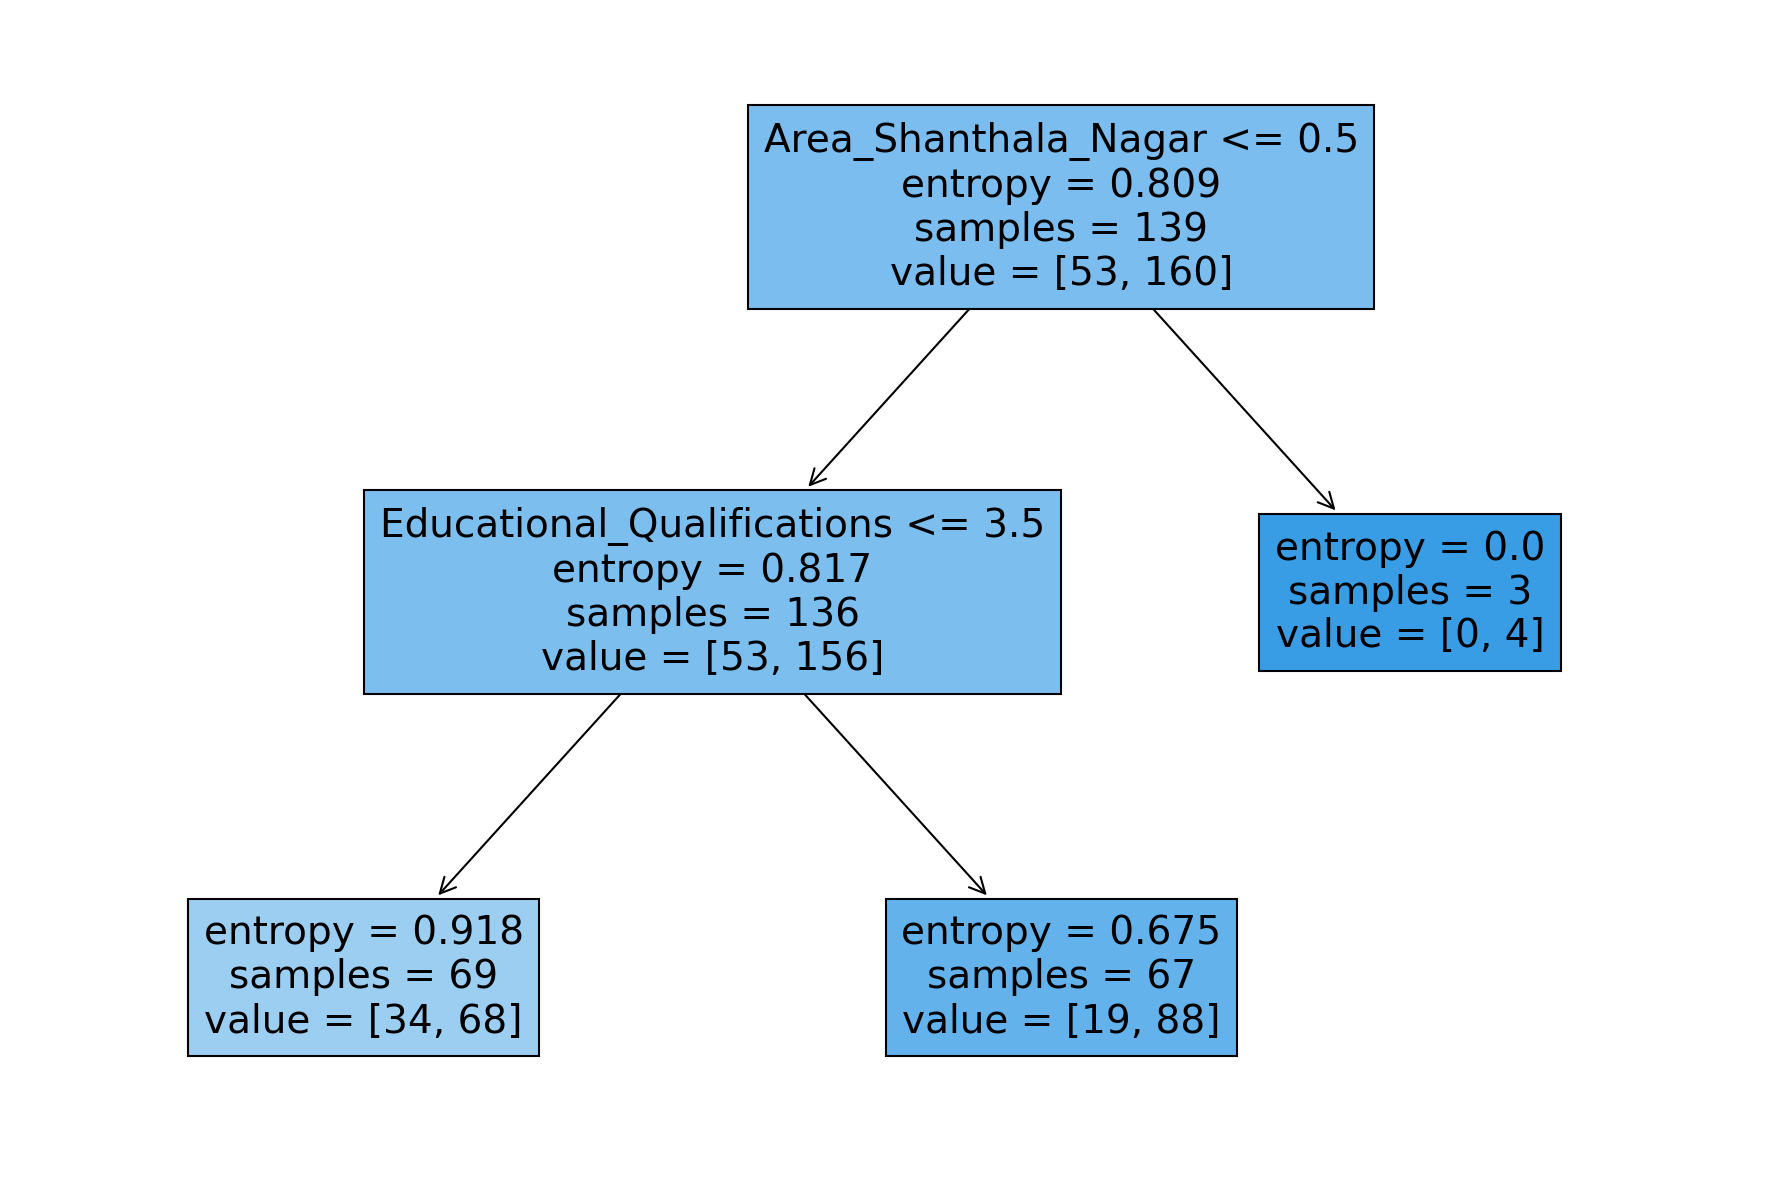

In [176]:
plt.figure(figsize = (15,10),dpi = 150)
plot_tree(rf.estimators_[1],filled = True, feature_names=list(xtrain.columns))
plt.show()

#### SVM (Time Taking for Higher Dimensional Data)

Support vectors (Data Points taken to Identify Maximal Margin Classifier) - for linear data

for non-linear data kernel trick is used to divide classes - rbf , poly

#### Naive Bayes

Naive Bayes works on Bayesian Probability formula

In [177]:
nb.fit(xtrain, ytrain)

GaussianNB()

#### Xgboost

Boosting Algorithm where for the selected number of models , one model error will be trained by another model

we need to install xgboost, using anaconda prompt - pip install xgboost

In [178]:
xgb = XGBClassifier(n_estimators=10,reg_alpha=0.5)

In [179]:
# xgboost accepts label data as number

ytrain_xg = np.where(ytrain == 'yes',1,0)

In [180]:
xgb.fit(xtrain,ytrain_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### 9. Model Performance<a id='eval'>

[Back to Top](#menu)

* Checking Trained Model Performances on Test Data

* Using x_test data we will be getting predictions, these predictions will be compared to y_test

* To check Model Performance we can use evaluation methods

    * Error/Loss
    * Model Score 
    * Bias-Variance Trade off (Underfit or Overfit)
    * Cross-Val Score

For classification we can use these evaluation


Performance Metric | Classification
-------|-----------
**Loss or Error**|**Confusion Matrix (Number of right/wrong predictions)**
**Model Score (Evaluation)** | **Accuracy Score (Balanced Data) , F1-Score/Auc-Roc Score (For Imbalanced Data)**
**Bias-Variance Trade Off**|Higher error & Lower score (underfit)
-|Low Train error & High Test error (Overfit)
**Cross-Val Score**|Checking trained model performance on entire X and y data

**As we have imbalanced data considering auc-roc score for better understanding model**

In [181]:
# Modules for Metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score

**Checking the above models perfomance using Test data**

In [182]:
names = ['LogisticRegression', 'KNearestNeighbors', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Xgboost']

models = [log, knn, nb, dt, rf, xgb]

# KNN & SVM will take more time

**Confusion_matrix , Classification_report & auc-roc curve score**

Model: LogisticRegression

Classification Report:
               precision    recall  f1-score   support

          no       0.86      0.33      0.48        18
         yes       0.82      0.98      0.89        54

    accuracy                           0.82        72
   macro avg       0.84      0.66      0.69        72
weighted avg       0.83      0.82      0.79        72

Confusion_Matrix:


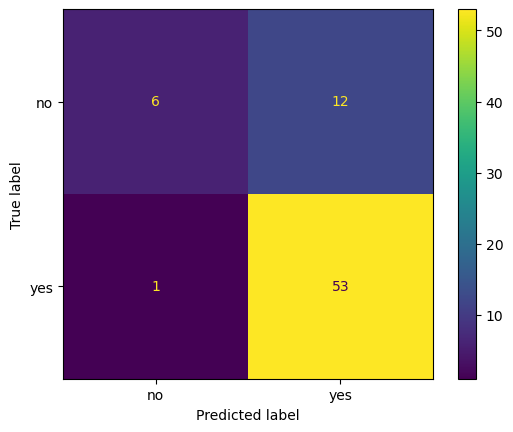

AUC-ROC:


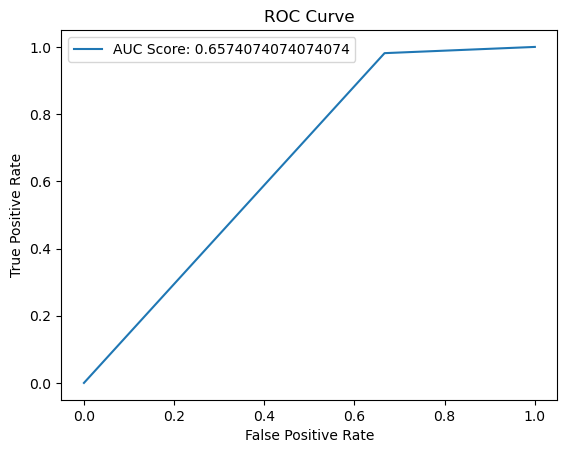

-----------------------------------------------------------------------------------
Model: KNearestNeighbors



AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [183]:
for i in range(len(models)):
    print(green("Model: {}\n".format(names[i]),['bold']))
    if models[i] == xgb:
        ytest_pred = models[i].predict(xtest)
        ytest = np.where(ytest == 'yes',1,0)
        print("Classification Report:\n",classification_report(ytest, ytest_pred))
        print(blue("Confusion_Matrix:",['bold']))
        plt.show(ConfusionMatrixDisplay.from_estimator(models[i], xtest, ytest))
        print(red("AUC-ROC:",['bold']))
        fpr, tpr, threshold = roc_curve(ytest, ytest_pred)
        ytest = np.where(ytest == 1,'yes','no')
        auc_score = auc(fpr, tpr)
        auc_str = "AUC Score: "+ str(auc_score)
        plt.plot(fpr,tpr,label=auc_str)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()
        print("-----------------------------------------------------------------------------------")
    else:
        ytest_pred = models[i].predict(xtest)
        print("Classification Report:\n",classification_report(ytest, ytest_pred))
        print(blue("Confusion_Matrix:",['bold']))
        plt.show(ConfusionMatrixDisplay.from_estimator(models[i], xtest, ytest))
        print(red("AUC-ROC:",['bold']))
        ytest = np.where(ytest == 'yes',1,0)
        ytest_pred = np.where(ytest_pred == 'yes',1,0)
        fpr, tpr, threshold = roc_curve(ytest, ytest_pred)
        ytest = np.where(ytest == 1,'yes','no')
        auc_score = auc(fpr, tpr)
        auc_str = "AUC Score: "+ str(auc_score)
        plt.plot(fpr,tpr,label=auc_str)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()
        print("-----------------------------------------------------------------------------------")

**Checking accuracy_scores for train and test both**

In [ ]:
Model = []
Trainedmodel = []
trainscore = []
testscore = []
fit = []

In [ ]:
for i in range(len(models)):
    
    if models[i] == xgb:
        
        ytrain = np.where(ytrain == 'yes',1,0)
        ytest = np.where(ytest == 'yes',1,0)
        
        ytrain_pred = models[i].predict(xtrain)
        ytest_pred = models[i].predict(xtest)
        
        fpr_tr, tpr_tr, threshold_tr = roc_curve(ytrain, ytrain_pred)
        auc_score_tr = auc(fpr_tr, tpr_tr)
        
        fpr_te, tpr_te, threshold_te = roc_curve(ytest, ytest_pred)
        auc_score_te = auc(fpr_te, tpr_te)

        trainscore.append(auc_score_tr)
        testscore.append(auc_score_te)

        trscore = auc_score_tr
        tescore = auc_score_te

        if trscore<0.50 and tescore<0.50:
            fit.append("Underfit")
        elif trscore>0.70 and tescore<0.60:
            fit.append("Overfit")
        else:
            fit.append("Goodfit")
        
        ytrain = np.where(ytrain == 1,'yes','no')
        ytest = np.where(ytest == 1,'yes','no')
        
    else:
        
        ytrain = np.where(ytrain == 'yes',1,0)
        ytest = np.where(ytest == 'yes',1,0)
        
        ytrain_pred = models[i].predict(xtrain)
        ytest_pred = models[i].predict(xtest)
        
        ytrain_pred = np.where(ytrain_pred == 'yes',1,0)
        ytest_pred = np.where(ytest_pred == 'yes',1,0)
        
        fpr_tr, tpr_tr, threshold_tr = roc_curve(ytrain, ytrain_pred)
        auc_score_tr = auc(fpr_tr, tpr_tr)
        
        fpr_te, tpr_te, threshold_te = roc_curve(ytest, ytest_pred)
        auc_score_te = auc(fpr_te, tpr_te)

        trainscore.append(auc_score_tr)
        testscore.append(auc_score_te)

        trscore = auc_score_tr
        tescore = auc_score_te

        if trscore<0.50 and tescore<0.50:
            fit.append("Underfit")
        elif trscore>0.70 and tescore<0.60:
            fit.append("Overfit")
        else:
            fit.append("Goodfit")
        
        ytrain = np.where(ytrain == 1,'yes','no')
        ytest = np.where(ytest == 1,'yes','no')
        
        ytrain_pred = np.where(ytrain_pred == 1,'yes','no')
        ytest_pred = np.where(ytest_pred == 1,'yes','no')

In [ ]:
pd.DataFrame({'Model':names, 'Trainedmodel':models,'Trainscore':trainscore, 'Testscore':testscore, 'Fit':fit})

#### Better Performance Model:

From the Observation of above results

**Xgboost Given Better accuracy score for both train and test compared to Other**